In [1]:
import numpy as nm
import matplotlib.pyplot as plt

In [2]:
data = nm.array([[3, 1.5, 1],
                 [2, 1, 0],
                 [4, 1.5, 1],
                 [3, 1, 0],
                 [3.5, .5, 1],
                 [2, .5, 0],
                 [5.5, 1, 1],
                 [1, 1, 0]
                 ])

mystery_data = [4.5, 1]

In [3]:
w1 = nm.random.randn()  # get random numbers so we train machine through them
w2 = nm.random.randn()
b = nm.random.randn()

In [4]:
print("before training")
print("w1: " + str(w1))
print("w2: " + str(w2))
print("b: " + str(b))

before training
w1: -1.4678987202115321
w2: 0.05707669514617389
b: -0.07266949452849651


In [5]:
def NN(m1, w1, m2, w2, b):
    z = m1 * w1 + m2 * w2 + b
    return sigmoid(z)

In [6]:
def sigmoid(x):  # sigmoid function for prediction
    return 1 / (1 + nm.exp(-x))


def sigmoid_p(x):  # to find derivative of x
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
z = mystery_data[0] * w1 + mystery_data[1] * w2 + b
print("mystery answer before: " + str(NN(mystery_data[0], w1, mystery_data[1], w2, b)))

learning_rate = .2

mystery answer before: 0.0013301440028847397


In [8]:
# training loop
for i in range(50000):
    ri = nm.random.randint(len(data))
    point = data[ri]
    # print(point)

    z = point[0] * w1 + point[1] * w2 + b
    prediction = sigmoid(z)  # our prediction

    target = point[2]
    cost = nm.square(prediction - target)  # cost

    dcost_pred = 2 * (prediction - target)  # slope
    dpred_dz = sigmoid_p(z)  # derivative of z

    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1

    dcost_dz = dcost_pred * dpred_dz  # slope * derivatives of inputs

    dcost_dw1 = dcost_dz * dz_dw1  # partial derivatives
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db

    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

    # if i % 100 == 0:
    #     cost_sum = 0
    #     for j in range(len(data)):
    #         point = data[j]
    #         z = point[0] * w1 + point[1] * w2 + b
    #         pred = sigmoid(z)
    #
    #         target = point[2]
    #         cost_sum += nm.square(pred - target)
    #
    #     costs.append(cost_sum / len(data))
#
# plt.plot(costs)
# plt.show()

In [9]:
print("after training")
print("w1: " + str(w1))
print("w2: " + str(w2))
print("b: " + str(b))

z = mystery_data[0] * w1 + mystery_data[1] * w2 + b
print("mystery answer after: " + str(NN(mystery_data[0], w1, mystery_data[1], w2, b)))

plt.figure('Neural Network')  # set figure name before set data
plt.title("Linear Regression")

after training
w1: 6.98156383652307
w2: 3.110551758208748
b: -24.348222908669175
mystery answer after: 0.9999620561855093


red
blue
red
red
red
blue
red
blue


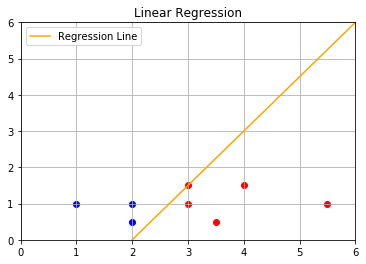

In [10]:
# seeing model predictions after training
for i in range(len(data)):
    point = data[i]

    # print(point)
    z = point[0] * w1 + point[1] + w2 + b
    pred = sigmoid(z)
    # print("pred: {}".format(pred))

    if pred > .5:
        print("red")
        color = "r"
    else:
        print("blue")
        color = "b"

    plt.scatter(point[0], point[1], c=color)

plt.axis([0, 6, 0, 6])
plt.plot([2, 6], [0, 6], "orange", label="Regression Line")
plt.legend()  # enable legends
plt.grid()  # enable grid
plt.show()

# b + w1*point[0]